# Neuronale Netze

Neuronale Netze bestehen aus <b>Schichten</b> (engl. <b>layer</b>) von Neuronen. Ein Neuron ist nicht mit einem Neuron der gleichen Schicht verbunden, sondern mit bestimmten Neuronen der Vorgänger- und Nachfolgerschicht (falls vorhanden). Die erste Schicht bezeichnet man als <b>Eingabeschicht</b> (engl. <b>input layer</b>). Die Eingabeschicht muss genauso viele „Eingänge” haben, wie die Größe der Daten, die das neuronale Netz klassifizieren soll (z.B. muss ein neuronales Netz 784 Eingänge haben, wenn es 28 mal 28 Pixel große Schwarzweißbilder zu klassifizieren hat). Die letzte Schicht bezeichnet man als <b>Ausgabeschicht</b> (engl. <b>output layer</b>). Die Anzahl der Neuronen in der Ausgabeschicht muss mit der Anzahl der zu klassifiziereden Klassen übereinstimmen. Die Ausgabe eines Neuron $i$ in der Ausgabeschicht entspricht typischerweise einer Prozentangabe, die die Wahrscheinlichkeit angibt, dass der eingegebene Datenpunkt der Klasse $i$ angehört. Die Schichten zwischen der Ein- und Ausgabeschicht bezeichnet man als <b>versteckte Schichten</b> (engl. <b>hidden layers</b>). Wenn ein neuronales Netz viele versteckte Schichten hat, bezeichnet man als es <b>tiefes neuronales Netz</b> (engl. <b>deep neural network</b>).

&nbsp;


 <figure>
  <img src="img/deep_neural_network.webp" alt="Deep Neural Network" style="width:45%">
  <figcaption></figcaption>
</figure> 

&nbsp;

In der gezeigten Darstellung findet die Verarbeitung der „Signale“ in den Kreisen statt. Hier werden die gewichteten Eingaben zu einer Summe addiert, um anschließend die Summe in eine Aktivierungsfunktion einzusetzen. Du kennst bereits vom Perzeptron die Treppenfunktion als Aktivierungsfunktion. In neuronalen Netzen werden andere Aktivierungsfunktionen benutzt. Drei wichtige Aktivierungsfunktionen sind die Sigmoid-Funktion, die Tangens-hyberbolicus-Funktion und der insbesondere die <b>ReLu-Funktion</b>. 

&nbsp;


 <figure>
  <img src="img/activation.webp" alt="Aktivierungsfunktionen" style="width:65%">
  <figcaption></figcaption>
</figure> 

&nbsp;

____


<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Setze die ReLu-Funktion in Code um.</i>

In [1]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

An den Verbindungen zwischen den Schichten werden die Gewichte geschrieben, mit denen die jeweilige Ausgabe eines Neurons multipliziert wird, um anschließend als Eingabe für das andere Neuron zu dienen. Wenn wir davon sprechen, dass wir ein neuronale Netz trainieren, dann machen wir nichts anderes, als die Gewichte an unsere Daten anzupassen. Nur diese Gewichte ändern sich die im Laufe des Trainings; alles andere bleibt gleich.

&nbsp;


 <figure>
  <img src="img/weights.webp" alt="weights" style="width:30%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Diese Gewichte müssen irgendwie gespeichert werden. Dafür verwendet man Tensoren, die im nächsten Abschnitt vorgestellt werden.

In [2]:
# Führe dieses Codefeld aus, um die notwendigen Bibliotheken zu importieren.

import numpy as np
import torch
import matplotlib.pyplot as plt
from copy import deepcopy

In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/pytho

## Tensoren

Möchtest du gleich mehrere Zahlen in einem Objekt speichern, kannst du dafür Matrizen / Arrays verwenden. Wir möchten die Gewichte zwischen jeder Schicht als Matrizen speichern.


 <figure>
  <img src="img/matrix.png" alt="matrix" style="width:35%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Du kennst bereits die Arrays aus der Bibliothek <i>numpy</i>. Die Arrays von <i>torch</i> unterscheiden sich nur im Detail von den bereits bekannten Arrays und werden <b>Tensoren</b> genannt. Mache dich im folgenden Codefeld mit diesen vertraut.

In [164]:
# Erzeugt einen Tensor mit zufälligen 1 x 4 Einträgen.
t1 = torch.rand(4)
# Erzeugt einen Tensor mit zufälligen 2 x 3 Einträgen.
t2 = torch.rand(2, 3)

# Erzeugt einen Tensor mit 1 x 10 0-Einträgen.
t3 = torch.zeros(10)
# Erzeugt einen Tensor mit 4 x 5 1-Einträgen.
t4 = torch.ones(4,5)

# Mit folgendem Befehl kannst du dir die Größe / „Form“ des Tensors ausgeben lassen.
print("Form des Tensors: ", t4.shape)

# Möchtest du eine Eintrag aus dem Tensor ausgeben lassen, kannst du den Tensor indizieren.
eintrag = t4[0]

# Mit [:a] und [a:] kannst du dir nur einen Teil des Tensors ausgeben lassen.
t2[:2]
t2[2:]

# Mit folgendem Befehl kannst du eine Zahl aus einem Tensor ausgeben lassen.
zahl = t2[0][0].item()

# Mit folgendem Befehl kannst du den Tensor in eine andere Form umformen.
t5 = t4
t5.reshape(20,)

# Mit folgendem Befehl kannst du zwei Tensoren miteinander verbinden.
torch.cat((torch.rand(2,2), torch.rand(2,2)), 0)

# Mit folgendem Befehl kannst du alle Einträgt aufsummieren.
sum(t5)

# ein weiterer nützlicher Befehl:
t6 = torch.rand(1,5)
print(t6)
t6 = t6.squeeze(0)
print(t6)

print("Eintrag= ", eintrag)
print("Zahl= ", zahl)

Form des Tensors:  torch.Size([4, 5])
tensor([[0.7748, 0.1872, 0.6274, 0.0749, 0.3580]])
tensor([0.7748, 0.1872, 0.6274, 0.0749, 0.3580])
Eintrag=  tensor([1., 1., 1., 1., 1.])
Zahl=  0.46636438369750977


____


<img style="float: left;" src="img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Vervollständige das Codefeld, indem du den Anweisungen folgst.</i>

In [25]:
t = torch.tensor([[2, 3, 7], [1, 8, 10]])

# Gebe die Form des Tensors t aus.
t.shape

# Gebe den ersten Eintrag der ersten Zeile aus.
t[0][0]

# Gebe den zweiten Eintrag der zweiten Zeile als Integer-Zahl aus.
t[0][0].item()

# Erzeuge einen Tensor, der Form 1 x 5 und nur aus 2en als Einträge hat.
2 * torch.ones(5,)

# Erzeuge zwei zufällige Tensoren der Form 2 x 2 und multipliziere die entsprechenden Einträge miteinander. 
t1 = torch.rand(2,2)
t2 = torch.rand(2,2)
t3 = t1 * t2
print(t1)
print(t2)
print(t3)

# Verbinde deine zwei erzeugten Tensoren zu einem Tensor.
t4 = torch.cat((t1, t2), 0)

# Forme den neuen Tensor in die Form mit 1 x 8 Einträgen um und addiere zu jedem Wert 2 dazu.
t4 = t4.reshape(8,) + 2 * torch.ones(8)
print(t4)

# Lösche die letzen beiden Einträge des letzen Tensors. 
t4 = t4[:6]
print(t4.shape)

# Forme den Tensor t in die Form mit 1 x 6 Einträgen um
t = t.reshape(6,)

# Berechne die Differenz der jeweiligen Einträge des aktuellen Tensors und t und summiere sie auf.
print("t=", t)
print("t4=", t4)
differenz = sum(t) - sum(t4)
print(differenz)

differenz1 = sum(t-t4)
print(differenz1)

tensor([[0.0562, 0.0321],
        [0.4173, 0.0675]])
tensor([[0.0982, 0.8530],
        [0.1315, 0.7529]])
tensor([[0.0055, 0.0274],
        [0.0549, 0.0508]])
tensor([2.0562, 2.0321, 2.4173, 2.0675, 2.0982, 2.8530, 2.1315, 2.7529])
torch.Size([6])
t= tensor([ 2,  3,  7,  1,  8, 10])
t4= tensor([2.0562, 2.0321, 2.4173, 2.0675, 2.0982, 2.8530])
tensor(17.4756)
tensor(17.4756)


## Daten erzeugen

Um neuronale Netze trainieren zu können, benötigen wir <b>gelabelte</b> Daten. Die gelabelten Daten mit denen die Gewichte angepasst werden, werden <b>Trainigsdaten</b> genannt. Um die Performance des neuronalen Netzes zu beurteilen, benötigen wir gelabelte Daten, auf denen das neuronale Netz <i>nicht</i> trainiert. Diese Daten werden <b>Testdaten</b> genannt. 
____


<img style="float: left;" src="img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Erzeuge 100 gelabelte Datenpunkte für den Trainingsdatensatz und 20 für den Testdatensatz im Intervall $0$ bis $1$. Die Punkte gehören entweder der Klasse $0$ oder $1$ an. Die beiden Klassen sollen dabei nicht durch eine Gerade getrennt werden können. Du kannst z.B. die Funktion $f(x)=x^2$ als Trennline der beiden Klassen verwenden</i>

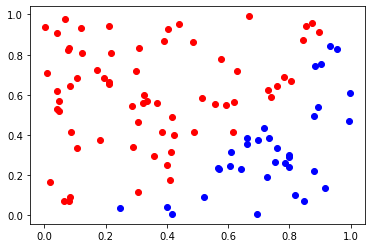

In [27]:
import random

train_data1 = torch.tensor([])
train_labels1 = torch.tensor([])
for i in range(100):
    x1 = random.uniform(0,1)
    x2 = random.uniform(0,1)
    train_data1 = torch.cat( (train_data1, torch.tensor([[x1, x2]])))
    
    if x2 >= x1 * x1:
        train_labels1 = torch.cat( (train_labels1, torch.tensor([1.0]) ))
    else:
        train_labels1 = torch.cat((train_labels1, torch.tensor([0.0])  ))
        
for i in range(train_labels1.shape[0]):
    if train_labels1[i].item() == 0:
        plt.scatter(train_data1[i][0].item(), train_data1[i][1].item(), color="blue")
    else:
        plt.scatter(train_data1[i][0].item(), train_data1[i][1].item(), color="red")

____


<img style="float: left;" src="img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Erzeuge nun einen Trainigs- und Testdatensatz für 4 Klassen.</i>

In [199]:
# Füge hier deinen Code ein.

## Neuronale Netze

In diesem Abschnitt lernst du, wie du mithilfe der Bibliothek <i>PyTorch</i> neuronale Netze sehr einfach erstellen und trainieren kannst.

In [42]:
# Erzeugt eine Schicht mit drei Inputs und drei Outputs.
layer1 = torch.nn.Linear(3,3)
gewichte_layer1 = layer1.weight
bias_layer1 = layer1.bias

# Aktivierungsfunktion ReLU
relu = torch.nn.ReLU()
input = torch.tensor([1.0, -2.0, 3.0, -4.0])
output = relu(input)
print("ReLU-Input=", input)
print("ReLU-Output=", output)

# SoftMax
softmax = torch.nn.Softmax()
input = torch.tensor([0.4, 0.15, 3.8, 2.3])
output = softmax(input)
print("Softmax-Input=", input)
print("Softmax-Output=", output)

ReLU-Input= tensor([ 1., -2.,  3., -4.])
ReLU-Output= tensor([1., 0., 3., 0.])
Softmax-Input= tensor([0.4000, 0.1500, 3.8000, 2.3000])
Softmax-Output= tensor([0.0260, 0.0203, 0.7797, 0.1740])


/home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Wir möchten nun folgendes neuronale Netz mithilfe von <i>PyTorch</i> realisieren. Die Biase werden aus Gründen der Übersicht bei Abbildungen oft weggelassen.
 
&nbsp;

 <figure>
  <img src="img/neuronales_Netz.png" alt="matrix" style="width:75%">
  <figcaption></figcaption>
</figure> 

&nbsp;

In [41]:
 class Net(torch.nn.Module):

    def __init__(self, num_in, num_out):
        super(Net, self).__init__()
        pass
            
    def forward(self, x):    
        pass
    
    def train_model(self, dataloader, lr):
        # Der Optimizer verwaltet die Lernrate
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        
        for data, label in dataloader:
            
            # Hier wird die sogenannte Loss-Funktion definiert. 
            # Dabei berechnet diese Funktion, wie weit das Netz vom gewünschten Output entfernt ist.
            # Es gibt für den Loss Möglichkeiten. 
            # Die Cross-Entropy-Loss-Funktion ist eine der beliebtesten Funktionen.
            loss_fn = torch.nn.CrossEntropyLoss()

            # Bei jedem Training muss dieser Befehl aufgerufen werden.
            # Dieser Aufruf „erlaubt” es die Gradienten der Gewichte zu berechnen,
            # so dass diese mit dem Backpropagation-Algorithmus angepasst werden können.
            self.train(True)

            # Der Optimizer löscht die berechteten Gradienten aus dem letzen Durchlauf.
            optimizer.zero_grad()

            # Die Daten werden durch das neuronale Netz propagiert und 
            # die jeweiligen Outputs werden gespeichert. 
            outputs = self(data)
            
            # Hier wird der Loss berechnet.
            loss = loss_fn(outputs, label)

            # Hier werden die Gradienten berechnet.
            loss.backward()

            # Der Optimizer updatet die Gewichte.
            optimizer.step()
        
    def test(self, test_data, test_labels):
        self.train(False)
        loss_fn = torch.nn.CrossEntropyLoss()
        outputs = self(test_data)
        loss = loss_fn(outputs, test_labels)
        return loss

____


<img style="float: left;" src="img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Implementiere eine Funktion, die die Genauigkeit des neuronalen Netzes auf den gegebenen Daten auswertet.</i>

In [ ]:
# Füge hier deinen Code ein.

____


<img style="float: left;" src="img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Implementiere eine Methode für den ganzen Trainingsablauf. Als Parameter werden der Traingsdatensatz mit den Labels, der Testdatensatz mit den Labels, die Lernrate und die Anzahl der Epochen übergeben.</i>

In [ ]:
# Füge hier deinen Code ein.

____


<img style="float: left;" src="img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Berechne nach jeder Epoche den gesamten Fehler und die Genauigkeit auf den Daten und zeichne die Punkte in einem Koordinatensystem mithilfe von PyPlot ein.</i>

## Underfitting und Overfitting

Trainierst du dein neuronales Netz zu wenig, so wird es deine Daten nicht gut klassifizieren können. Dieses Phänomen bezeichnet man als <b>Underfitting</b>. Trainierst du dein neuronales Netz zu lange, so lernt es die Trainingsdaten auswendig und die Performance auf unbekannten Daten, also auf den Testdaten, sinkt. Das bezeichnet man als <b>Overfitting</b>. Du musst also eine gute Balance zwischen zu wenig und zu viel Training finden. Dafür kannst du dich dafür am Loss auf den Testdaten orientieren.

&nbsp;

 <figure>
  <img src="img/overfitting.png" alt="Overfitting" style="width:40%">
  <figcaption></figcaption>
</figure> 

&nbsp;
____


<img style="float: left;" src="img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Um Overfitting zu vermeiden, kannst du das aktuell beste Model immer speichern. Speichere also oben in deinem Trainingsablauf immer das beste Modell ab.</i>

